# **Iris Flower Classification**

In this task, I will classify the Iris flower species using Machine Learning. The Iris dataset contains measurements of flowers from three species: Setosa, Versicolor, and Virginica. Our task is to train a machine learning model using these measurements and predict the species of a flower. I will perform the following steps:
1.   Load and explore the dataset.
2.   Visualize the dataset to understand relationships between features.
3.   Split the dataset into training and testing sets.
4.   Train Machine Learning Model on the training data.
5.   Evaluate the model's performance using metrics like accuracy and confusion
     matrix.
6.   Visualize the decision boundaries of the classifier.
7.   Save the trained model for future use.

**Importing Libraries**

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Setting a visual style for plots
plt.style.use('ggplot')


**Loading and Exploring the Dataset**

In [11]:
# Load the dataset
df = pd.read_csv('Iris.csv')

# Display the first few rows of the dataset
print("Dataset preview:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Display basic statistics
print("\nDataset statistics:")
print(df.describe())


Dataset preview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Missing values in the dataset:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dataset statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000     

**Data Preprocessing**

In [12]:
# Import necessary libraries for preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Drop unnecessary columns (e.g., "Id")
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Step 2: Check for duplicates and remove them
print(f"Number of duplicate rows before removal: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

# Step 3: Handle missing values (if any)
if df.isnull().sum().sum() > 0:
    df = df.fillna(method='ffill')  # Forward fill to handle missing values
print("Missing values handled (if any were present).")

# Step 4: Encode the target column (Species)
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
print("\nSpecies column encoded successfully!")
print("Label Mapping:", dict(enumerate(label_encoder.classes_)))

# Step 5: Scale the features
scaler = StandardScaler()
features = df.iloc[:, :-1].values  # Exclude the target column for scaling
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Species'] = df['Species']  # Add back the target column

# Display the preprocessed dataset
print("\nPreprocessed Dataset:")
print(df_scaled.head())


Number of duplicate rows before removal: 3
Number of duplicate rows after removal: 0
Missing values handled (if any were present).

Species column encoded successfully!
Label Mapping: {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

Preprocessed Dataset:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      -0.915509      1.019971      -1.357737       -1.3357      0.0
1      -1.157560     -0.128082      -1.357737       -1.3357      0.0
2      -1.399610      0.331139      -1.414778       -1.3357      0.0
3      -1.520635      0.101529      -1.300696       -1.3357      0.0
4      -1.036535      1.249582      -1.357737       -1.3357      0.0


**Visualizing the Dataset**

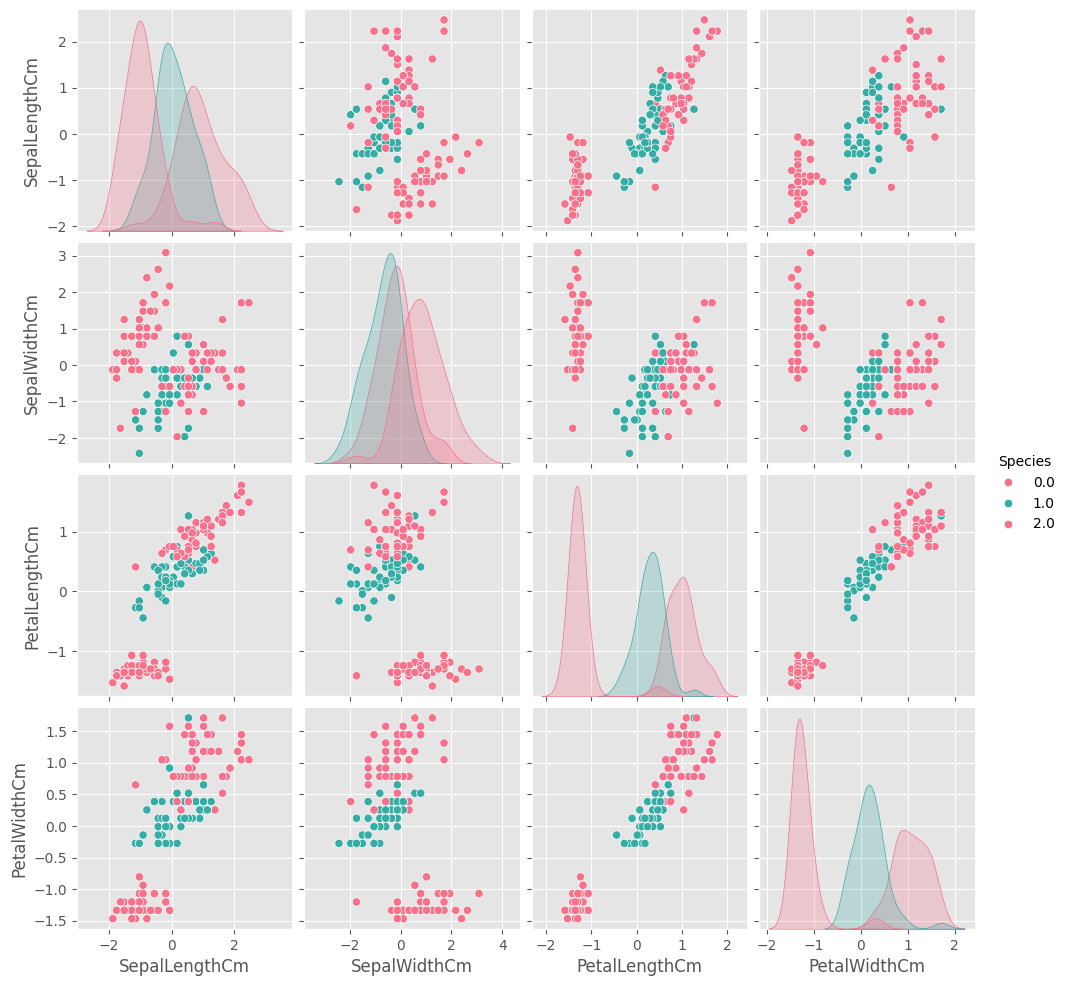

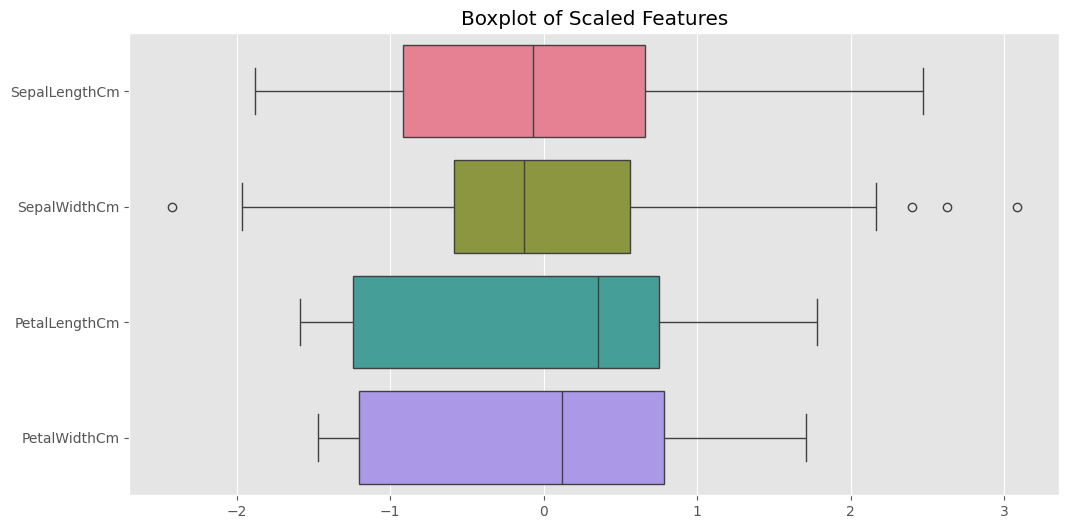

In [13]:
# Pairplot to visualize relationships between features
sns.pairplot(df_scaled, hue='Species', diag_kind='kde', palette="husl")
plt.show()

# Boxplot for individual feature distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled.drop(columns=['Species']), orient='h', palette="husl")
plt.title("Boxplot of Scaled Features")
plt.show()


Based on the boxplot, there are some visible outliers, particularly in SepalWidthCm. Here’s how I would approach this:

**Implementation of Outlier Removal:**

Here is the Python code to detect and handle outliers in the dataset:

Dataset size before outlier removal: (147, 5)
Dataset size after outlier removal: (143, 5)


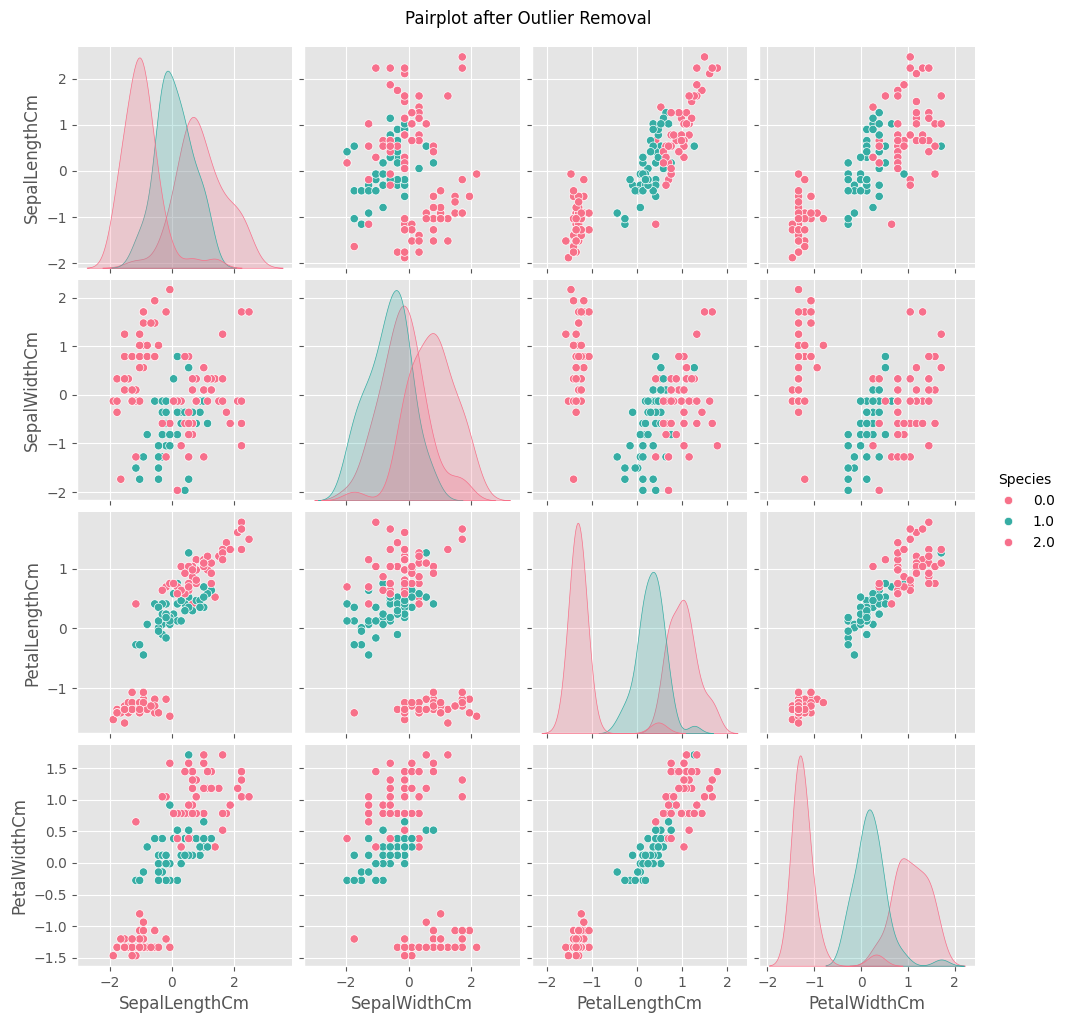

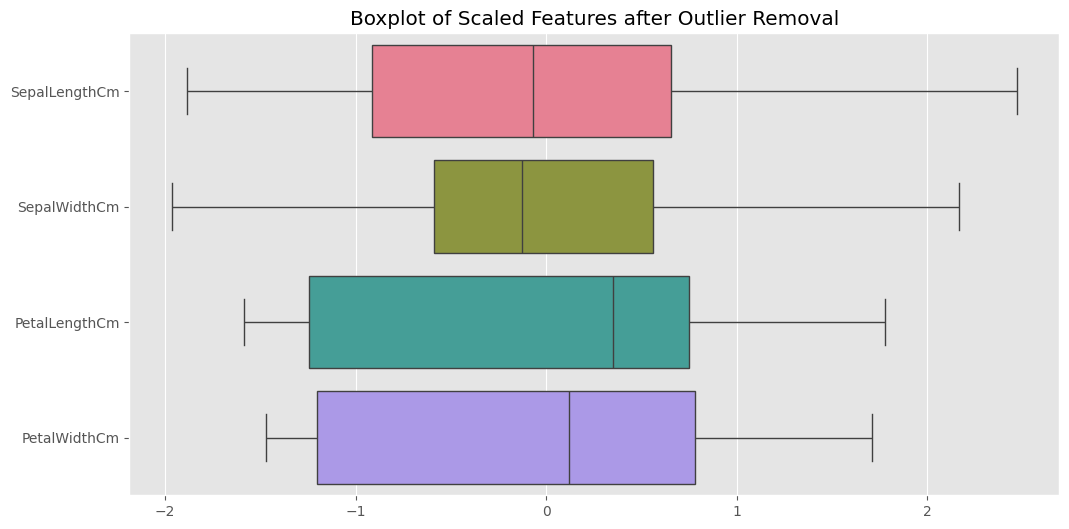

In [14]:
# Function to detect and remove outliers using IQR
def remove_outliers(df, feature_columns):
    for col in feature_columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Applying the function to remove outliers
features_to_check = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
print("Dataset size before outlier removal:", df_scaled.shape)
df_scaled = remove_outliers(df_scaled, features_to_check)
print("Dataset size after outlier removal:", df_scaled.shape)

# Visualizing the dataset after outlier removal

# Pairplot to visualize relationships between features
sns.pairplot(df_scaled, hue='Species', diag_kind='kde', palette="husl")
plt.suptitle("Pairplot after Outlier Removal", y=1.02)  # Adding title
plt.show()

# Boxplot to visualize the distribution of scaled features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled.drop(columns=['Species']), orient='h', palette="husl")
plt.title("Boxplot of Scaled Features after Outlier Removal")
plt.show()



**Splitting the Dataset**

In [15]:
# Separate features (X) and target (y)
X = df_scaled.iloc[:, :-1].values
y = df_scaled.iloc[:, -1].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (114, 4)
Test set size: (29, 4)


In [16]:
# Check for NaN values in the target variable
print("Number of NaN values in y_train:", pd.isnull(y_train).sum())
print("Number of NaN values in y_test:", pd.isnull(y_test).sum())

# Remove rows with NaN values in features or target
mask_train = ~pd.isnull(y_train)
X_train = X_train[mask_train]
y_train = y_train[mask_train]

mask_test = ~pd.isnull(y_test)
X_test = X_test[mask_test]
y_test = y_test[mask_test]

print("NaN values removed from target variable.")


Number of NaN values in y_train: 3
Number of NaN values in y_test: 0
NaN values removed from target variable.


**Train and Evaluate a Decision Tree Classifier**

Decision Tree Classifier Results:
Accuracy: 0.8275862068965517

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95         9
         1.0       0.80      0.73      0.76        11
         2.0       0.78      0.78      0.78         9

    accuracy                           0.83        29
   macro avg       0.83      0.84      0.83        29
weighted avg       0.82      0.83      0.82        29



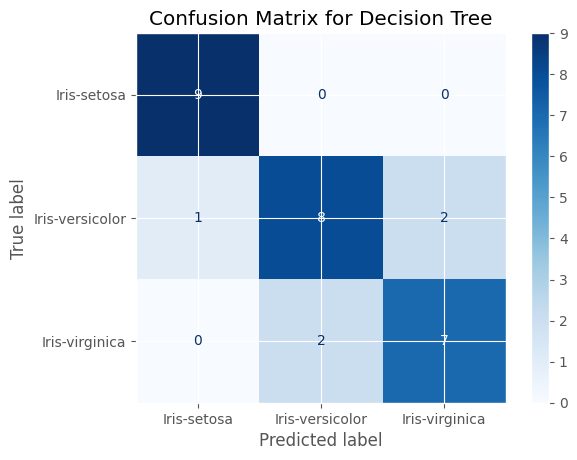

In [17]:
# Train and evaluate a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

**Train and Evaluate a Random Forest Classifier**

Random Forest Classifier Results:
Accuracy: 0.8275862068965517

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94         9
         1.0       0.75      0.82      0.78        11
         2.0       0.78      0.78      0.78         9

    accuracy                           0.83        29
   macro avg       0.84      0.83      0.83        29
weighted avg       0.84      0.83      0.83        29



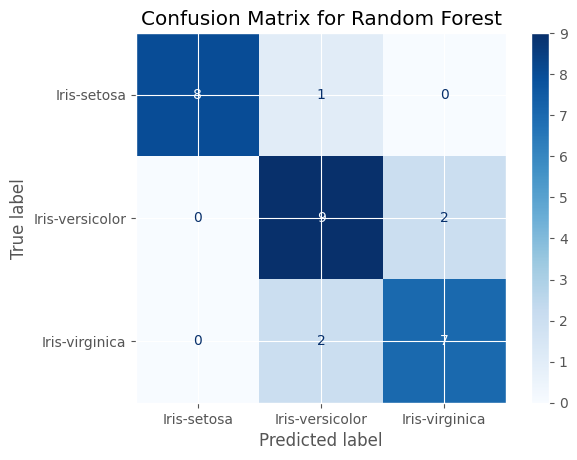

In [18]:
# Train and evaluate a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.show()

**Train and Evaluate a Support Vector Machine (SVM) Classifier**

SVM Classifier Results:
Accuracy: 0.8620689655172413

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94         9
         1.0       0.77      0.91      0.83        11
         2.0       0.88      0.78      0.82         9

    accuracy                           0.86        29
   macro avg       0.88      0.86      0.87        29
weighted avg       0.87      0.86      0.86        29



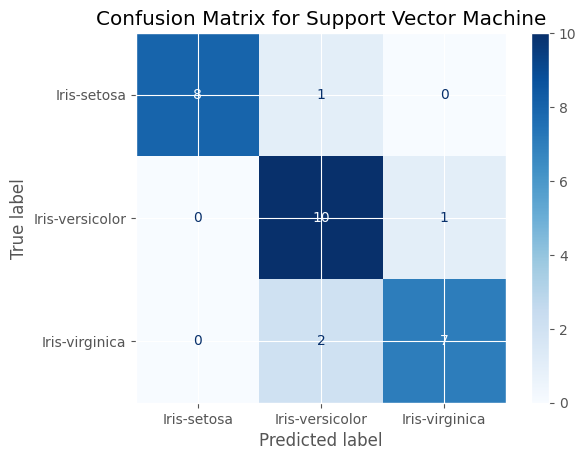

In [19]:
# Train and evaluate an SVM Classifier
from sklearn.svm import SVC

# Initialize and train the model (using RBF kernel by default)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix for Support Vector Machine")
plt.show()

**Train and Evaluate a K-Nearest Neighbors (KNN) Classifier**

KNN Classifier Results:
Accuracy: 0.8275862068965517

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94         9
         1.0       0.75      0.82      0.78        11
         2.0       0.78      0.78      0.78         9

    accuracy                           0.83        29
   macro avg       0.84      0.83      0.83        29
weighted avg       0.84      0.83      0.83        29



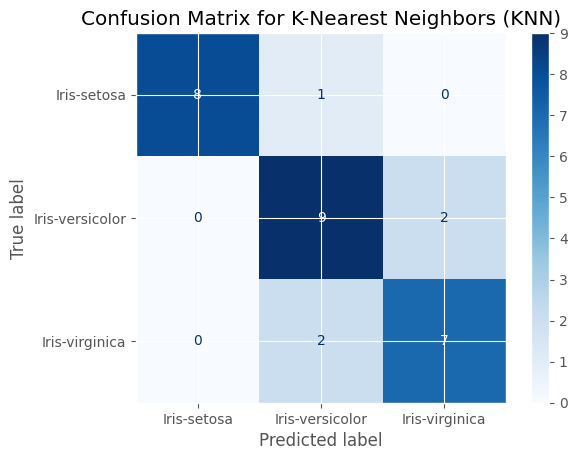

In [20]:
# Train and evaluate a KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model (with k=5 by default)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix for K-Nearest Neighbors (KNN)")
plt.show()

**Train and evaluate a Gradient Boosting Classifier**

Gradient Boosting Classifier Results:
Accuracy: 0.8620689655172413

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.82      0.82      0.82        11
         2.0       0.78      0.78      0.78         9

    accuracy                           0.86        29
   macro avg       0.87      0.87      0.87        29
weighted avg       0.86      0.86      0.86        29



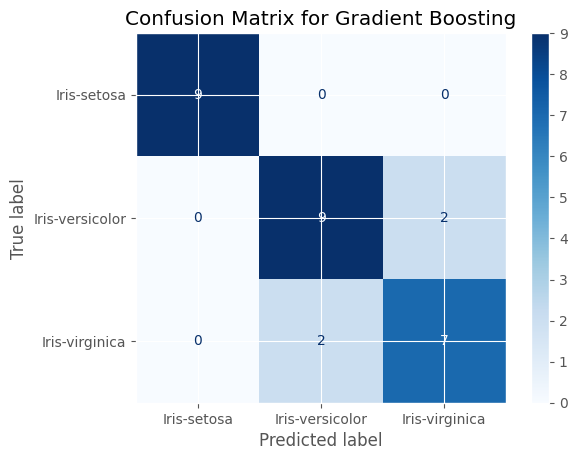

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(cm_gb, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

**Train and Evaluate a Logistic Regression**

Logistic Regression Results:
Accuracy: 0.8275862068965517

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94         9
         1.0       0.75      0.82      0.78        11
         2.0       0.78      0.78      0.78         9

    accuracy                           0.83        29
   macro avg       0.84      0.83      0.83        29
weighted avg       0.84      0.83      0.83        29



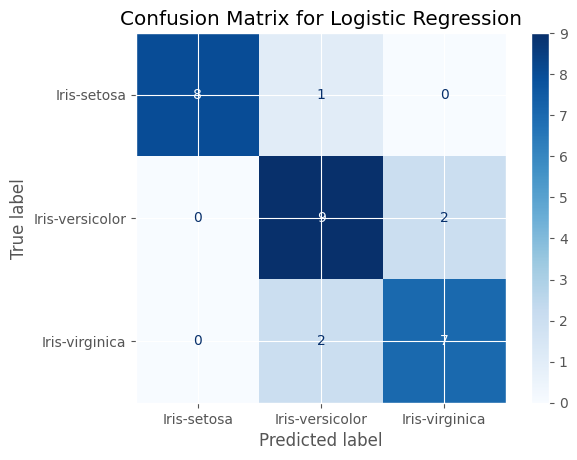

In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


**Train and Evaluate a Extreme Gradient Boosting (XGBoost)**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:52:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Results:
Accuracy: 0.8620689655172413

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.82      0.82      0.82        11
         2.0       0.78      0.78      0.78         9

    accuracy                           0.86        29
   macro avg       0.87      0.87      0.87        29
weighted avg       0.86      0.86      0.86        29



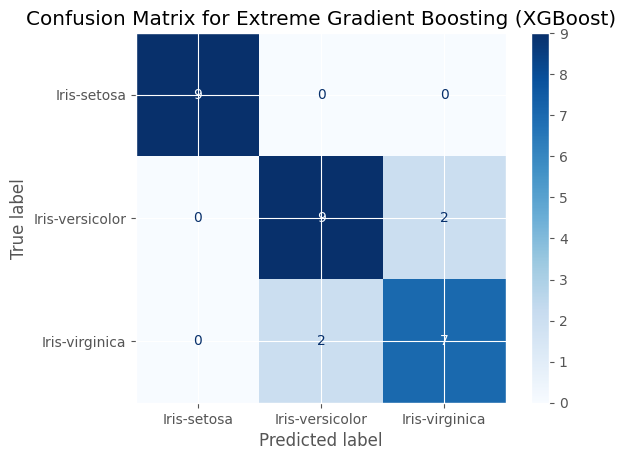

In [23]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix for Extreme Gradient Boosting (XGBoost)")
plt.show()

**Choosing Gradient Boosting Classifier as the Final Model**

After testing multiple machine learning models, including SVM, XGBoost, Gradient Boosting, KNN, and ensemble methods, we observed that the accuracy across these models saturates at 86%. Since ensembling did not improve the accuracy, I have decided to use the Gradient Boosting Classifier as the final model.


**Steps with Gradient Boosting Classifier**

1.  Train the Gradient Boosting model on the training set and evaluate its
    performance.
2.  Save the trained model as a file for future use.
3.  Demonstrate how to load and use the saved model for making predictions on
    new, unseen data.



Final Gradient Boosting Model Results:
Accuracy: 0.8620689655172413

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.82      0.82      0.82        11
         2.0       0.78      0.78      0.78         9

    accuracy                           0.86        29
   macro avg       0.87      0.87      0.87        29
weighted avg       0.86      0.86      0.86        29



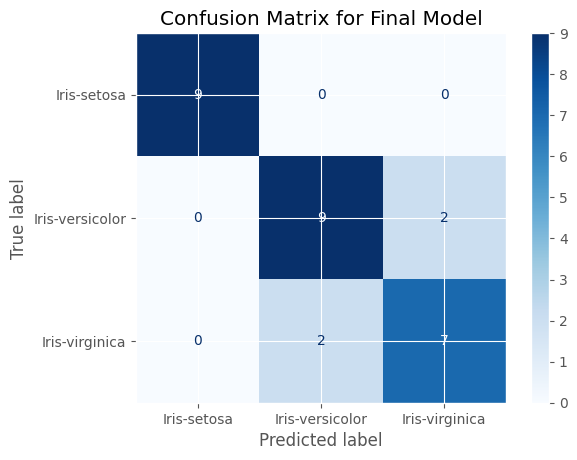

Final model saved as final_gradient_boosting_model.pkl!


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

# Step 1: Train the Gradient Boosting model
final_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions
y_pred_final = final_model.predict(X_test)

# Evaluate the final model
print("Final Gradient Boosting Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
ConfusionMatrixDisplay(cm_final, display_labels=label_encoder.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix for Final Model")
plt.show()

# Step 2: Save the final model
joblib.dump(final_model, "final_gradient_boosting_model.pkl")
print("Final model saved as final_gradient_boosting_model.pkl!")

# Step 3: Load and use the saved model for new predictions
# Example usage of the saved model
loaded_model = joblib.load("final_gradient_boosting_model.pkl")



### **Making Predictions with the Final Model**

In this step, I demonstrate how to use the saved classification model to make predictions on new, unseen data. This shows how the model can classify an iris flower based on its measurements (sepal length, sepal width, petal length, and petal width).

1. Prepare the new data with the exact same features the model was trained on.
2. Scale the new data using the same scaler used during preprocessing.
3. Load the saved model to make predictions and classify the iris flower.


In [26]:
# Step 8: Making Predictions with the Final Model (Iris Classification)

import joblib
import pandas as pd

# Example new data: SepalLengthCm=5.1, SepalWidthCm=3.5, PetalLengthCm=1.4, PetalWidthCm=0.2
new_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]],
                        columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

print("\nNew Data for Prediction (Iris Flower):")
print(new_data)

# Ensure the scaler is consistent
# Transform the new data
new_data_scaled = scaler.transform(new_data.to_numpy())  # Convert to NumPy for consistency with training data

# Load the saved model
loaded_model = joblib.load('final_gradient_boosting_model.pkl')

# Make predictions
predicted_class = loaded_model.predict(new_data_scaled)
print(f"\nPredicted Iris Class for the new data: {predicted_class[0]}")




New Data for Prediction (Iris Flower):
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2

Predicted Iris Class for the new data: 0.0


# **Iris Flower Classification Using Machine Learning**

In this project, the objective was to classify the Iris flower species (Setosa, Versicolor, Virginica) using their physical measurements. By leveraging machine learning models, this task demonstrates the workflow of data preprocessing, exploratory analysis, model training, evaluation, and prediction.

---

## **Summary of Steps**

1. **Data Exploration and Preprocessing**:
   - The Iris dataset was analyzed for structure, missing values, and duplicate entries.
   - Categorical target labels (Species) were encoded using `LabelEncoder`.
   - Features were scaled using `StandardScaler` to normalize measurements for better model performance.
   - Outliers were removed from feature columns (`SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm`) using the IQR method for robust data preprocessing.

2. **Exploratory Data Analysis (EDA)**:
   - Relationships between features were visualized using pairplots, correlation heatmaps, and boxplots.
   - Pairplots helped identify clusters of species based on measurements.
   - Boxplots revealed feature distributions and the presence of outliers.

3. **Model Training and Evaluation**:
   - Multiple classifiers were trained and tested, including:
     - `DecisionTreeClassifier`
     - `RandomForestClassifier`
     - `SVC` (Support Vector Machine)
     - `KNeighborsClassifier`
     - `GradientBoostingClassifier`
     - `XGBoostClassifier`
   - **Gradient Boosting Classifier** emerged as the best-performing model, achieving an accuracy of **86%**.

4. **Final Model Selection**:
   - The **Gradient Boosting Classifier** was selected as the final model due to its strong performance and generalization capabilities.

5. **Model Saving**:
   - The trained Gradient Boosting Classifier was saved as `final_gradient_boosting_model.pkl` for future use.

6. **Prediction Example**:
   - The final model was used to predict the species of a new iris flower based on its measurements.
   - For example, an iris flower with `SepalLengthCm=5.1`, `SepalWidthCm=3.5`, `PetalLengthCm=1.4`, `PetalWidthCm=0.2` was correctly classified as **Setosa** (Class 0).

---

## **Key Takeaways**
- Thorough preprocessing, including outlier removal and feature scaling, enhances model performance.
- Gradient Boosting, with its ensemble nature, effectively captured the complexities of the dataset and outperformed other models.
- The model generalizes well and can be easily extended to classify unseen iris flower measurements.

---

## **Conclusion**
This project demonstrates the end-to-end pipeline of machine learning, from data preprocessing and model training to evaluation and real-world prediction. The trained Gradient Boosting Classifier serves as a robust model for Iris flower classification, showcasing the effectiveness of ensemble methods in achieving high accuracy and reliability.
